# Spam Email Classification

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("mail_data.csv") # creating dataframe 


print(df.head())
print(df.columns)

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Index(['Category', 'Message'], dtype='object')


In [3]:
print(df.isnull().sum())  #Check missing values 

# handling missing values
df.dropna(inplace= True)  

# handling duplicates 
df.drop_duplicates(inplace= True)

Category    0
Message     0
dtype: int64


C:\Users\Shreyas\AppData\Local\Temp\ipykernel_17160\2888701375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["Category"], palette= 'coolwarm')


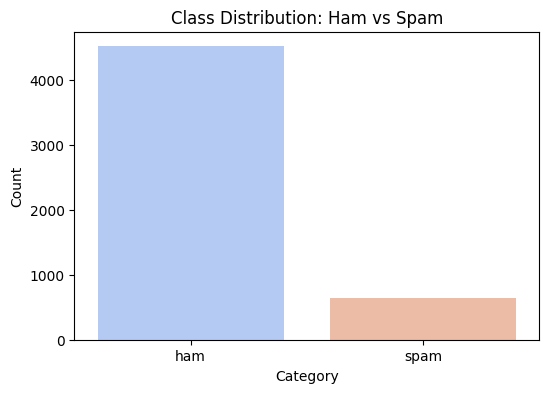

In [4]:
plt.figure(figsize=(6,4)) #Learning data occurence
sns.countplot(x = df["Category"], palette= 'coolwarm') 
plt.title("Class Distribution: Ham vs Spam")  
plt.xlabel("Category")  
plt.ylabel("Count")  
plt.show()

Classifying ham as 0 and spam as 1 for the classification model 

In [5]:
df["Category"] = df["Category"].map({'ham' : 0, 'spam' :1})

Getting sample datas 

In [6]:
print(df["Message"].sample(5, random_state=42))  # Print 5 random messages

3031    Also sir, i sent you an email about how to log...
495                      Are you free now?can i call now?
2942    My supervisor find 4 me one lor i thk his stud...
3911    She.s good. She was wondering if you wont say ...
3360    Sorry I missed your call let's talk when you h...
Name: Message, dtype: object


Checking special chars

In [7]:
import re  

# Checking special characters in df 
special_characters = df[df["Message"].str.contains(r"[@#$%^&*()<>?/|}{~:]", regex=True)]
print(special_characters.head(5))


    Category                                            Message
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
5          1  FreeMsg Hey there darling it's been 3 week's n...
7          0  As per your request 'Melle Melle (Oru Minnamin...
9          1  Had your mobile 11 months or more? U R entitle...
10         0  I'm gonna be home soon and i don't want to tal...


checking html_tags 

In [8]:
html_tags = df[df["Message"].str.contains(r"<.*?>", regex = True)] 
print(html_tags.head(5))

      Category                                            Message
690          1  <Forwarded from 448712404000>Please CALL 08712...
2267         1  <Forwarded from 88877>FREE entry into our £250...
2297         1  <Forwarded from 21870000>Hi - this is your Mai...
2620         1  <Forwarded from 21870000>Hi - this is your Mai...
4112         1  URGENT! Your Mobile number has been awarded a ...


Detecting Non-English chars 

In [9]:
from langdetect import detect
  
# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "error" 
    
df["Language"] = df["Message"].apply(detect_language) 

print(df["Language"].value_counts())

Language
en       4713
af         58
so         38
nl         38
cy         34
fr         31
no         27
it         26
id         23
da         19
de         18
tl         18
sw         14
ca         14
et         12
sv          9
hr          9
es          8
sq          6
sl          6
sk          6
vi          6
pl          5
tr          4
pt          4
error       3
ro          3
cs          2
lt          2
fi          1
Name: count, dtype: int64


Detect Irreveleant characters

In [10]:
# Find rows with too many numbers or symbols
weird_chars = df[df["Message"].str.contains(r"[^a-zA-Z0-9\s]", regex=True)]
print(weird_chars.sample(5))


      Category                                            Message Language
1945         0  Yeah, I'll leave in a couple minutes &amp; let...       en
4676         1  Hi babe its Chloe, how r u? I was smashed on s...       en
3824         0  Please protect yourself from e-threats. SIB ne...       en
1338         0       Then she buying today? Ü no need to c meh...       en
2152         0  I surely dont forgot to come:)i will always be...       en


## Combine Multiple Datasets for Diversity

In [11]:
# Load CSV files without assuming headers
df1 = pd.read_csv("mail_data.csv", header=None)
df2 = pd.read_csv("spam after new update.csv", header=None)

# Print column names to debug
print("File 1 Columns:", df1.columns)
print("File 2 Columns:", df2.columns)

File 1 Columns: Index([0, 1], dtype='int64')
File 2 Columns: Index([0, 1, 2, 3, 4], dtype='int64')


In [12]:
# Getting data from CSV files 
#df1 = pd.read_csv("mail_data.csv", encoding="ISO-8859-1")
#df2 = pd.read_csv("spam after new update.csv", encoding="ISO-8859-1") 

df1 = pd.read_csv("mail_data.csv", header=None, usecols=[0, 1], names=['Category', 'Message'] , encoding="ISO-8859-1")
df2 = pd.read_csv("spam after new update.csv", header=None, usecols=[0, 1], names=['Category', 'Message'] , encoding="ISO-8859-1")

# Remove rows where Category or Message is missing
df1.dropna(subset=['Category', 'Message'], inplace=True)
df2.dropna(subset=['Category', 'Message'], inplace=True)


df = pd.concat([df1, df2], ignore_index= True) 

df.to_csv("data.csv" , index = False)

Remaking the above steps of EDA for the combined dataset 

In [13]:
print(df.isnull().sum())  #Check missing values 

# handling missing values
df.dropna(inplace= True)  

# handling duplicates 
df.drop_duplicates(inplace= True)

Category    0
Message     0
dtype: int64


C:\Users\Shreyas\AppData\Local\Temp\ipykernel_17160\2888701375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["Category"], palette= 'coolwarm')


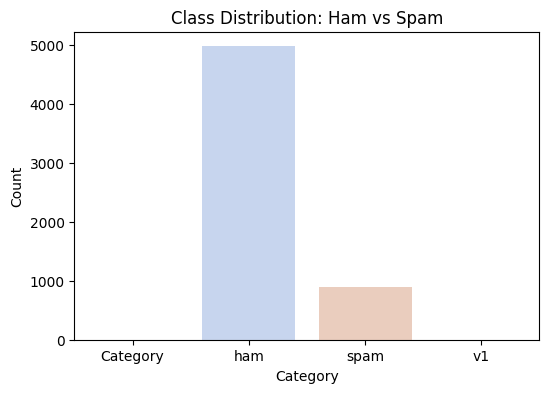

In [14]:
plt.figure(figsize=(6,4)) #Learning data occurence
sns.countplot(x = df["Category"], palette= 'coolwarm') 
plt.title("Class Distribution: Ham vs Spam")  
plt.xlabel("Category")  
plt.ylabel("Count")  
plt.show()

The data is imbalanced , hence applying SMOTE 

Missing values in y: 0


C:\Users\Shreyas\AppData\Local\Temp\ipykernel_17160\1018649435.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_resampled["Category"], palette='coolwarm')


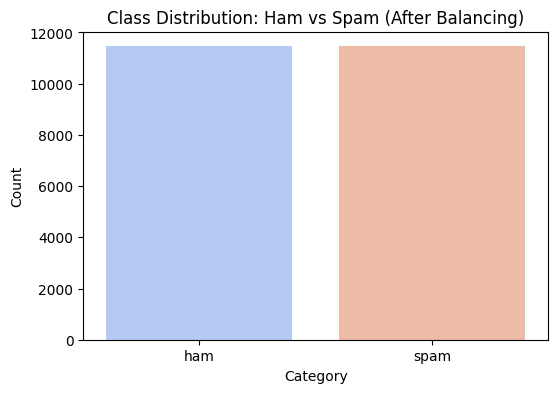

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv("data.csv")

# ✅ Drop rows where Category or Message is NaN
df.dropna(subset=['Category', 'Message'], inplace=True)

# Convert "Category" column to binary (0 = ham, 1 = spam)
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# ✅ Drop rows where Category is NaN after mapping
df.dropna(subset=['Category'], inplace=True)

# Convert text messages into numerical form using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Message'])  
y = df['Category']  # Target labels

# ✅ Ensure y has no NaN values before SMOTE
print("Missing values in y:", y.isna().sum())  # Should print 0

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame for visualization
df_resampled = pd.DataFrame({'Category': y_resampled})  
df_resampled['Category'] = df_resampled['Category'].map({0: 'ham', 1: 'spam'})  # Convert back to labels

# ✅ Replot Class Distribution After Balancing
plt.figure(figsize=(6, 4))
sns.countplot(x=df_resampled["Category"], palette='coolwarm')
plt.title("Class Distribution: Ham vs Spam (After Balancing)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
